### ***2 sources of data right now :***
FOOTBALL API (to get result of football) : https://www.football-data.org/

CFC Data : csv files

In [ ]:
%pip install requests
%pip install pandas
%pip install parquet
%pip install numpy
%pip install configparser
%pip install pyarrow
%pip install deltalake
%pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
No

In [7]:
%pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd  # Pour manipuler les données
import matplotlib.pyplot as plt  # Pour les graphiques
import seaborn as sns  # Pour des visualisations plus jolies

Matplotlib is building the font cache; this may take a moment.


##### **DATA CFC**



**GPS DATA**

GPS performance metrics track movement demands, including speed, distance, and acceleration, to assess workload and physical output.

This dataset contains simulated data for 1 player.

**date**: The date of the recorded session or match

**opposition_code**: A unique identifier for the opposing team

**opposition_full**: The full name of the opposing team

**md_plus_code**: A marker for the number of days after a match (e.g., MD+1 refers to one day post-match)

**md_minus_code**: A marker for the number of days before a match (e.g., MD-1 refers to one day before a match)

**season**: The football season during which the data was recorded

**distance**: The total distance covered by a player during the session or match, measured in meters or kilometers

**distance_over_21**: The distance covered at a speed above 21 km/h

**distance_over_24**: The distance covered at a speed above 24 km/h

**distance_over_27**: The distance covered at a speed above 27 km/h

**accel_decel_over_2_5**: The number of accelerations or decelerations above 2.5 m/s²

**accel_decel_over_3_5**: The number of accelerations or decelerations above 3.5 m/s²

**accel_decel_over_4_5**: The number of accelerations or decelerations above 4.5 m/s²

**day_duration**: The duration of the session in minutes

**peak_speed**: The highest speed recorded during the session

**hr_zone_1_hms**: The total time spent in heart rate zone 1 (50-60% Max HR)

**hr_zone_2_hms**: The total time spent in heart rate zone 2 (60-70% Max HR)

**hr_zone_3_hms**: The total time spent in heart rate zone 3 (70-80% Max HR)

**hr_zone_4_hms**: The total time spent in heart rate zone 4 (80-90% Max HR)

**hr_zone_5_hms**: The total time spent in heart rate zone 5 (90-100% Max HR)

In [158]:
#lire le fichier CSV
path_to = "/Users/focus_profond/GIT_repo/CFC-vizathon/DATA/"
name_file = "CFC_GPS_Data.csv"
full_path = path_to+name_file
df_gps = pd.read_csv(full_path, encoding="utf-8")


In [159]:
df_no_session = df_gps[df_gps['day_duration']==0]
df_no_session['opposition_code'].unique() #[nan, 'ARS', 'TOT', 'BRE']
for e in ("ARS",'TOT','BRE'):
    my_var = 'df_no_session_'+e
    my_var = df_no_session[df_no_session['opposition_code']==e]
    my_var.head()
df_no_session_ARS = df_no_session[df_no_session['opposition_code']=='ARS']
df_no_session_TOT = df_no_session[df_no_session['opposition_code']=='TOT']
df_no_session_BRE = df_no_session[df_no_session['opposition_code']=='BRE']
#df_no_session_ARS.head()
df_no_session_TOT.head()
#df_no_session_BRE.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
853,03/04/2025,TOT,Tottenham Hotspur,0,0,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


In [160]:
df_no_session['distance'].unique()
df_weird_1 = df_no_session[df_no_session['distance']==1935.425236 ]
df_weird_1.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
362,29/09/2023,NaN,NaN,2,-3,2023/2024,1935.425236,243.564965,65.667569,43.924938,50.860547,17.848229,8.032501,0.0,30.07501,00:01:12,00:01:12,00:03:42,00:02:20,00:00:02


In [161]:
df_gps.head()


,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,119.108101,32.636928,8.557443,76.242369,30.75590,00:03:40,00:17:29,00:19:20,00:11:23,00:00:02
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,45.974019,6.309730,3.095990,65.217830,28.67495,00:06:44,00:16:40,00:15:35,00:06:08,00:00:01
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,97.488512,24.400180,3.825869,105.139759,29.21720,00:17:29,00:37:09,00:23:49,00:06:30,00:00:02
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,43.750265,14.642925,2.189602,64.588434,28.70300,00:07:34,00:15:51,00:07:31,00:01:51,00:00:00
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,122.568127,49.748446,22.201737,46.048353,30.29812,00:01:09,00:01:04,00:11:34,00:13:15,00:02:30


In [162]:
df_gps.tail()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
857,07/04/2025,NaN,NaN,1,-5,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
858,08/04/2025,NaN,NaN,2,-4,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
859,09/04/2025,NaN,NaN,3,-3,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
860,10/04/2025,NaN,NaN,4,-2,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
861,11/04/2025,NaN,NaN,5,-1,2024/2025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


In [163]:
#vérifier la structure des données
#print(df.info())  # Vérifie les types de données et valeurs manquantes
nbr_row = df_gps.shape[0]
nbr_column = df_gps.shape[1]
list_column = [df.columns.values]
print("nbr_row : ", nbr_row)
print("nbr_column : ", nbr_column)
print("list_column : ", list_column)

nbr_row :  862
nbr_column :  20
list_column :  [array(['date', 'opposition_code', 'opposition_full', 'md_plus_code',
       'md_minus_code', 'season', 'distance', 'distance_over_21',
       'distance_over_24', 'distance_over_27', 'accel_decel_over_2_5',
       'accel_decel_over_3_5', 'accel_decel_over_4_5', 'day_duration',
       'peak_speed', 'hr_zone_1_hms', 'hr_zone_2_hms', 'hr_zone_3_hms',
       'hr_zone_4_hms', 'hr_zone_5_hms'], dtype=object)]


In [164]:
min_date = df_gps['date'].min()
max_date = df_gps['date'].max()
print(min_date, '    ', max_date)

01/01/2023      31/12/2024


In [165]:
#lister les valeurs manqauntes par colonne :
print(df_gps.isnull().sum())
#we can see that opposition code et opposition full ont beaucoup de lignes manquantes.

date                      0
opposition_code         715
opposition_full         715
md_plus_code              0
md_minus_code             0
season                    0
distance                  0
distance_over_21          0
distance_over_24          0
distance_over_27          0
accel_decel_over_2_5      0
accel_decel_over_3_5      0
accel_decel_over_4_5      0
day_duration              0
peak_speed                0
hr_zone_1_hms             0
hr_zone_2_hms             0
hr_zone_3_hms             0
hr_zone_4_hms             0
hr_zone_5_hms             0
dtype: int64


In [166]:
print(df_gps.duplicated().sum())  # Nombre de lignes dupliquées
#df.drop_duplicates(inplace=True)  # Supprime les doublons

0


In [167]:
df_gps.describe()  # Statistiques générales sur les colonnes numériques

,md_plus_code,md_minus_code,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,3.489559,-3.482599,4348.397275,206.384127,87.730266,32.143318,93.532909,30.914458,9.413703,62.351265,24.327300
std,3.246978,3.239427,2841.399651,214.513552,103.481000,43.921496,64.593942,24.278089,8.803952,35.677410,10.914528
min,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-5.000000,2711.332083,40.067120,11.019218,1.239599,50.181008,14.031534,2.862817,45.343532,26.884825
50%,2.000000,-2.000000,4229.806525,140.624828,52.006816,14.919966,91.089483,27.642968,7.496299,67.636717,28.763600
75%,5.000000,-1.000000,6021.526515,292.186658,127.505919,43.802949,134.137148,44.412446,13.057154,85.325991,30.357408
max,10.000000,0.000000,15653.250800,1011.791940,543.629710,286.564259,326.736174,119.575568,43.411480,212.770547,32.937000


In [168]:
df.describe(include="object") # Analyse des colonnes texte

,date,opposition_code,opposition_full,season,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
count,862,147,147,862,862,862,862,862,862
unique,862,43,43,3,490,603,573,554,91
top,02/08/2022,MCI,Manchester City,2023/2024,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
freq,1,9,9,305,141,141,141,141,255


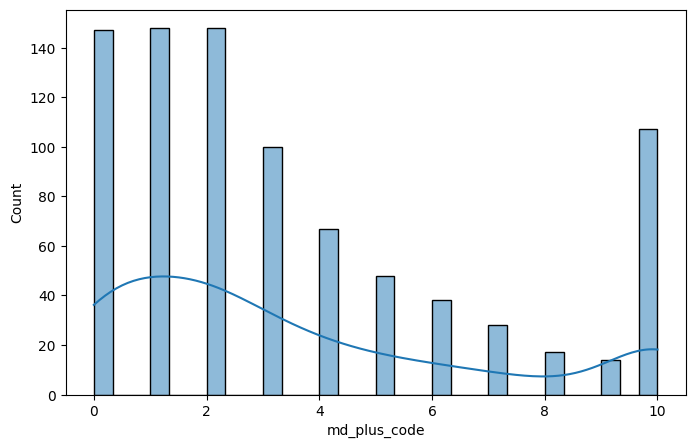

In [169]:
#Vérifier la distribution des valeurs
#Pour une colonne numérique :
plt.figure(figsize=(8,5))
sns.histplot(df_gps["md_plus_code"], bins=30, kde=True)
plt.show()

opposition_full
Manchester City            9
Brighton & Hove Albion     8
Aston Villa                8
Newcastle United           7
Liverpool                  6
Tottenham Hotspur          6
West Ham United            6
AFC Bournemouth            6
Crystal Palace             6
Wolverhampton Wanderers    6
Brentford                  6
Arsenal                    6
Fulham                     5
Nottingham Forest          5
Everton                    5
Manchester United          5
Southampton                4
Leicester City             4
Leeds United               3
Real Madrid                3
Burnley                    2
Servette                   2
Middlesbrough              2
Milan                      2
Sheffield United           2
København                  2
Luton Town                 2
Borussia Dortmund          2
Dinamo Zagreb              2
Salzburg                   2
AFC Wimbledon              1
Heidenheim                 1
Morecambe                  1
Ipswich Town               

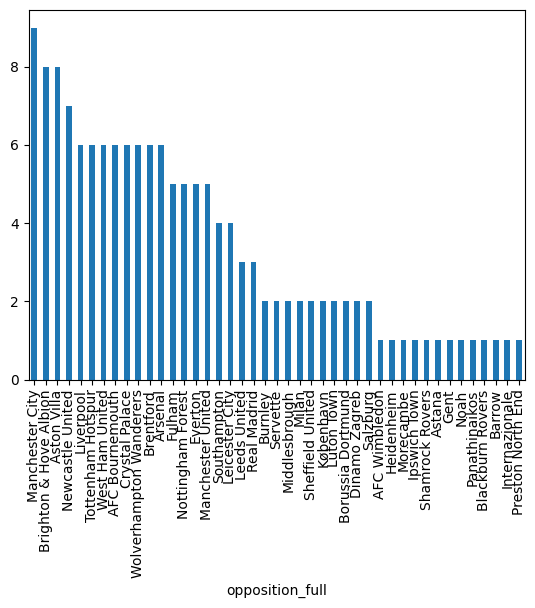

In [170]:
#Vérifier la distribution des valeurs
#Pour une colonne catégorielle :
print(df_gps["opposition_full"].value_counts())  # Fréquence des valeurs uniques
df_gps["opposition_full"].value_counts().plot(kind="bar")
plt.show()

**INDIVIDUAL DATA**

In [171]:
#lire le fichier CSV
path_to = "/Users/focus_profond/GIT_repo/CFC-vizathon/DATA/"
name_file = "CFC_Individual_Priority_Areas.csv"
full_path = path_to+name_file
df_individual = pd.read_csv(full_path, encoding="utf-8")


In [172]:
df_individual.head()

,Priority,Category,Area,Target,Performance Type,Target set,Review Date,Tracking
0,1,Recovery,Sleep,Increase average sleep by 1hr per night,Habit,07/03/2025,07/05/2025,On Track
1,2,Recovery,Nutrition,45g of carbohydrate every half time,Habit,07/03/2025,07/05/2025,On Track
2,3,Performance,Sprint,>65% in max velocity score,Outcome,07/03/2025,07/05/2025,Achieved


In [173]:
#vérifier la structure des données
#print(df.info())  # Vérifie les types de données et valeurs manquantes
nbr_row_ind = df_individual.shape[0]
nbr_column_ind = df_individual.shape[1]
list_column_ind = [df_individual.columns.values]
print("nbr_row : ", nbr_row_ind)
print("nbr_column : ", nbr_column_ind)
print("list_column : ", list_column_ind)

nbr_row :  3
nbr_column :  8
list_column :  [array(['Priority', 'Category', 'Area', 'Target', 'Performance Type',
       'Target set', 'Review Date', 'Tracking'], dtype=object)]


In [174]:
min_date = df_individual['date'].min()
max_date = df_individual['date'].max()
print(min_date, '    ', max_date)

KeyError: 'date'

**PHYSICAL CAPABILITY DATA**

In [ ]:
#lire le fichier CSV
path_to = "/Users/focus_profond/GIT_repo/CFC-vizathon/DATA/"
name_file = "CFC_Physical_Capability_Data.csv"
full_path = path_to+name_file
df_physical = pd.read_csv(full_path, encoding="utf-8")


In [ ]:
df_physical.head(5).sort_values('testDate')

,testDate,expression,movement,quality,benchmarkPct
0,03/07/2023,isometric,upper body,pull,NaN
1,04/07/2023,dynamic,agility,acceleration,0.3200
2,10/07/2023,dynamic,agility,deceleration,0.8670
3,18/07/2023,isometric,jump,take off,NaN
4,20/07/2023,dynamic,upper body,pull,0.8525


In [ ]:
df_physical['testDate'] = pd.to_datetime(df_physical['testDate'],format='%d/%m/%Y')
df_physical['Date']=df_physical['testDate'].dt.date
df_physical['year']=df_physical['testDate'].dt.year
df_physical['month']=df_physical['testDate'].dt.month
df_physical['day_nb']=df_physical['testDate'].dt.day

#df_physical['day_name']=df_physical['testDate'].dt.day
df_physical  = df_physical.sort_values('Date')
df_physical.head(10)

,testDate,expression,movement,quality,benchmarkPct,month,year,day_nb,day_name,Date
11498,2023-07-02,dynamic,sprint,acceleration,0.3580,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
4478,2023-07-02,isometric,jump,pre-load,NaN,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
10177,2023-07-02,dynamic,jump,land,0.7290,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
9077,2023-07-02,isometric,upper body,grapple,NaN,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
6414,2023-07-02,isometric,agility,acceleration,NaN,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
10932,2023-07-02,isometric,upper body,pull,NaN,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
5705,2023-07-02,isometric,agility,deceleration,0.9500,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
4573,2023-07-02,isometric,upper body,push,NaN,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
9799,2023-07-02,dynamic,jump,pre-load,0.5335,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02
2127,2023-07-02,isometric,jump,take off,NaN,7,2023,2,<bound method PandasDelegate._add_delegate_acc...,2023-07-02


In [ ]:
list_expr = df_physical['expression'].unique()
list_quality = df_physical['movement'].unique()
print(list_expr)
print(list_quality)

['dynamic' 'isometric']
['sprint' 'jump' 'upper body' 'agility']


In [ ]:
#vérifier la structure des données
#print(df.info())  # Vérifie les types de données et valeurs manquantes
nbr_row_phy = df_physical.shape[0]
nbr_column_phy = df_physical.shape[1]
list_column_phy = [df_physical.columns.values]
print("nbr_row : ", nbr_row_phy)
print("nbr_column : ", nbr_column_phy)
print("list_column : ", list_column_phy)

nbr_row :  12400
nbr_column :  10
list_column :  [array(['testDate', 'expression', 'movement', 'quality', 'benchmarkPct',
       'month', 'year', 'day_nb', 'day_name', 'Date'], dtype=object)]


In [ ]:
min_date = df_physical['Date'].min()
max_date = df_physical['Date'].max()
print(min_date, '    ', max_date)

2023-07-02      2025-03-12


**RECOVERY STATUS DATA**

In [ ]:
#lire le fichier CSV
path_to = "/Users/focus_profond/GIT_repo/CFC-vizathon/DATA/"
name_file = "CFC_Recovery_status_Data.csv"
full_path = path_to+name_file
df_recovery = pd.read_csv(full_path, encoding="utf-8")


In [ ]:
df_recovery.head(5)

,sessionDate,seasonName,metric,category,value
0,02/07/2023,2023/2024,bio_baseline_completeness,bio,0.0
1,02/07/2023,2023/2024,bio_baseline_composite,bio,NaN
2,02/07/2023,2023/2024,emboss_baseline_score,total,NaN
3,02/07/2023,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,0.0
4,02/07/2023,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,NaN


In [ ]:
#vérifier la structure des données
#print(df.info())  # Vérifie les types de données et valeurs manquantes
nbr_row_rec = df_recovery.shape[0]
nbr_column_rec = df_recovery.shape[1]
list_column_rec = [df_recovery.columns.values]
print("nbr_row : ", nbr_row_rec)
print("nbr_column : ", nbr_column_rec)
print("list_column : ", list_column_rec)

nbr_row :  8073
nbr_column :  5
list_column :  [array(['sessionDate', 'seasonName', 'metric', 'category', 'value'],
      dtype=object)]


In [ ]:
df_recovery['sessionDate'] = pd.to_datetime(df_recovery['sessionDate'],format='%d/%m/%Y')
df_recovery['Date']=df_recovery['sessionDate'].dt.date
df_recovery['year']=df_recovery['sessionDate'].dt.year
df_recovery['month']=df_recovery['sessionDate'].dt.month
df_recovery['day_nb']=df_recovery['sessionDate'].dt.day

#df_physical['day_name']=df_physical['testDate'].dt.day
df_recovery  = df_recovery.sort_values('Date')
df_recovery.head(10)

,sessionDate,seasonName,metric,category,value,Date,year,month,day_nb
0,2023-07-02,2023/2024,bio_baseline_completeness,bio,0.0,2023-07-02,2023,7,2
12,2023-07-02,2023/2024,subjective_baseline_composite,subjective,NaN,2023-07-02,2023,7,2
11,2023-07-02,2023/2024,subjective_baseline_completeness,subjective,0.0,2023-07-02,2023,7,2
10,2023-07-02,2023/2024,soreness_baseline_composite,soreness,NaN,2023-07-02,2023,7,2
8,2023-07-02,2023/2024,sleep_baseline_composite,sleep,NaN,2023-07-02,2023,7,2
7,2023-07-02,2023/2024,sleep_baseline_completeness,sleep,0.0,2023-07-02,2023,7,2
9,2023-07-02,2023/2024,soreness_baseline_completeness,soreness,0.0,2023-07-02,2023,7,2
5,2023-07-02,2023/2024,msk_load_tolerance_baseline_completeness,msk_load_tolerance,0.0,2023-07-02,2023,7,2
4,2023-07-02,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,NaN,2023-07-02,2023,7,2
3,2023-07-02,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,0.0,2023-07-02,2023,7,2


In [ ]:
min_date = df_recovery['Date'].min()
max_date = df_recovery['Date'].max()
print(min_date, '    ', max_date)

2023-07-02      2025-03-13


In [ ]:
list_expr = df_recovery['metric'].unique()
list_quality = df_recovery['category'].unique()
#list_value = df_recovery['value'].unique()   # 1211

print(list_expr)
print(list_quality)
#print(len(list_value))

['bio_baseline_completeness' 'subjective_baseline_composite'
 'subjective_baseline_completeness' 'soreness_baseline_composite'
 'sleep_baseline_composite' 'sleep_baseline_completeness'
 'soreness_baseline_completeness'
 'msk_load_tolerance_baseline_completeness'
 'msk_joint_range_baseline_composite'
 'msk_joint_range_baseline_completeness' 'emboss_baseline_score'
 'bio_baseline_composite' 'msk_load_tolerance_baseline_composite']
['bio' 'subjective' 'soreness' 'sleep' 'msk_load_tolerance'
 'msk_joint_range' 'total']
1211


##### **DATA Football API**



FOOTBALL API (to get result of football) : https://www.football-data.org/

In [175]:
import requests
#contiene una «impresora bonita» para producir vistas estéticamente agradables de estructuras de datos
import pandas as pd
from datetime import datetime, timedelta
from pprint import pprint

In [176]:
# todo la logica de la extraccion con un get 

def get_data(base_url, endpoint, data_field=None, params=None, headers=None):
    """
    Realiza una solicitud GET a una API para obtener datos.

    Parámetros:
    API luchtmeet DOCUMENTACION : https://api-docs.luchtmeetnet.nl/#intro


    base_url (str): La URL base de la API. 
    es como el menu de la API, donde hay todo 
    ejemplo : https://api.luchtmeetnet.nl/open_api
    

    endpoint (str): El endpoint de la API al que se realizará la solicitud.
    es una tabla de datos o un servicio de la API
    ejemplo : "components" o "organisation" o "station" o "measurements" : base_url + /stations/

    data_field (str): El nombre del campo en el JSON que contiene los datos.
    en el json de la response, va a haber varios campos, y uno en particularo : campo que tiene los datos
    ejemplo : el campo donde hay datos se llama  : "data"

    params (dict): Parámetros de consulta para enviar con la solicitud.
    headers (dict): Encabezados para enviar con la solicitud.

    Retorna:
    dict: Los datos obtenidos de la API en formato JSON.
    """
    try:
        #estamos concatendo el url y el endpoint 
        endpoint_url = f"{base_url}/{endpoint}"

        #pasamos la nueva url, y los params y headers 
        response = requests.get(endpoint_url, params=params, headers=headers)
        status_request = response.status_code
        print('The status response is: ',status_request)

        #si hay un error, no pasa nada, va a raise una excepcion 
        response.raise_for_status()  # Levanta una excepción si hay un error en la respuesta HTTP.

        # Verificar si los datos están en formato JSON.
        try:
            data = response.json()
            #if el data_field existe, accedo al campo "data_field" en el json y lo paso al variable data
            if data_field:
              data = data[data_field]
        except:
            print("El formato de respuesta no es el esperado")
            return None
        
        return data 

    except requests.exceptions.RequestException as e:
        # Capturar cualquier error de solicitud, como errores HTTP.
        print(f"La petición ha fallado. Código de error : {e}")
        return None


#para estructurar los datos ! Siempre hay que estructurar datos semi estructurados a datos estucturuados
#hay que "aplanar" (flatten) los datos de Json, en pandas, existe una metodo que puede aplanar estos datos json
#pandas se usa para manipular datos como si eran en tablas (aka dataframe) que tienen estructura de columnas y lineas

# una vez que convertimos el json hasta un dataframe, podremos enviar el dataframe a una tabla de base de datos relacionados
#y de esta manera, hicimos un ETL desde API to data models
def build_table(json_data):
    """
    Construye un DataFrame de pandas a partir de datos en formato JSON.

    Parámetros:
    json_data (dict): Los datos en formato JSON obtenidos de una API.

    Retorna:
    DataFrame: Un DataFrame de pandas que contiene los datos.
    """
    try:
        df = pd.json_normalize(json_data)
        return df
    except:
        print("Los datos no están en el formato esperado")
        return None

In [180]:
from configparser import ConfigParser

# Instanciar un ConfigParser, que se encargará de leer el archivo config.ini
parser = ConfigParser()
parser.read("pipeline.conf")

['pipeline.conf']

In [181]:
# acceder aux infos de l'API en question
#  DOCUMENTATION https://weatherstack.com/documentation#query_parameter
api_credentials = parser["football_API"]
access_token = api_credentials["access_token"]
base_url = api_credentials["base_url"]
print(access_token)

a6617b1b9a50417f9f4fc24268ddcdc9


In [179]:
#PARAMS and HEADERS for WS API
params ={}
headers={}

/v4/areas/{id}               List one particular area. 

/v4/areas/                   List all available areas.

/v4/competitions/            List all available competitions.

/v4/competitions/PL          List one particular competition.

competition/{id}/standings  or matches or teams or scorers or   Show Standings for a particular competition.

teams/{id}                  Show one particular team.

teams                       List teams.

/v4/teams/{id}/matches/     Show all matches for a particular team.

/v4/persons/{id}            List one particular person

/v4/persons/{id}/matches    Show all matches for a particular person.

/v4/matches/{id}            Show one particular match.

/v4/matches             	List matches across (a set of) competitions.

/v4/matches/{id}/head2head  List previous encounters for the teams of a match.



In [241]:
#list_endpoints = {'areas':'/v4/areas/', 'competitions':'/v4/competitions/PL/'}
list_countries = ['Europe','Portugal','England','Germany','France','Italy','Spain','Brazil','World','European Championships']
list_countries_code = ['BRA' 'ENG' 'EUR' 'FRA' 'DEU' 'ITA' 'POR' 'ESP' 'INT']
endpoint = 'competitions/'
json_data = get_data(base_url, endpoint, params = params,headers=headers)

The status response is:  200


In [197]:

df_competition = build_table(json_data['competitions'])
#df_competition['competitions'].head()
df_competition.head()

,id,name,code,type,emblem,plan,numberOfAvailableSeasons,lastUpdated,area.id,area.name,...,currentSeason.winner.shortName,currentSeason.winner.tla,currentSeason.winner.crest,currentSeason.winner.address,currentSeason.winner.website,currentSeason.winner.founded,currentSeason.winner.clubColors,currentSeason.winner.venue,currentSeason.winner.lastUpdated,currentSeason
0,2006,WC Qualification CAF,QCAF,CUP,None,TIER_FOUR,3,2022-03-13T18:51:44Z,2001,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2176,Africa Cup,AC,CUP,https://crests.football-data.org/ac.png,TIER_FOUR,2,2024-01-13T11:34:43Z,2001,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2166,AFC Champions League,ACL,CUP,None,TIER_FOUR,1,2023-02-26T12:57:33Z,2001,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,Primera B Nacional,PBN,LEAGUE,None,TIER_FOUR,5,2023-08-01T08:40:24Z,2011,Argentina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024,Liga Profesional,ASL,LEAGUE,https://crests.football-data.org/LPDF.svg,TIER_TWO,8,2024-09-13T16:34:03Z,2011,Argentina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list_countries_code = ['BRA' 'ENG' 'EUR' 'FRA' 'DEU' 'ITA' 'POR' 'ESP' 'INT']            #there is 9 countries authorized
list_compet_code = ['PL','CL','PPL','DED','BL1','FL1','SA','PD','ELC','BSA','WC','EC']   #there is 12 competitions authorized
df_competition = build_table(json_data['competitions'])
df_ac = df_competition[df_competition['code'].isin(list_compet_code)]

In [230]:
df_ac.head(20)

,id,name,code,type,emblem,plan,numberOfAvailableSeasons,lastUpdated,area.id,area.name,...,currentSeason.winner.shortName,currentSeason.winner.tla,currentSeason.winner.crest,currentSeason.winner.address,currentSeason.winner.website,currentSeason.winner.founded,currentSeason.winner.clubColors,currentSeason.winner.venue,currentSeason.winner.lastUpdated,currentSeason
25,2013,Campeonato Brasileiro Série A,BSA,LEAGUE,https://crests.football-data.org/bsa.png,TIER_ONE,9,2024-09-13T16:55:53Z,2032,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,2016,Championship,ELC,LEAGUE,https://crests.football-data.org/ELC.png,TIER_ONE,8,2024-09-13T16:51:18Z,2072,England,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2021,Premier League,PL,LEAGUE,https://crests.football-data.org/PL.png,TIER_ONE,126,2024-09-13T16:51:24Z,2072,England,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2001,UEFA Champions League,CL,CUP,https://crests.football-data.org/CL.png,TIER_ONE,45,2024-09-13T16:53:48Z,2077,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2018,European Championship,EC,CUP,https://crests.football-data.org/ec.png,TIER_ONE,17,2024-09-13T17:04:30Z,2077,Europe,...,Spain,ESP,https://crests.football-data.org/760.svg,"Ramón y Cajal, s/n Las Rozas 28230",http://www.rfef.es,1909.0,Red / Blue / Yellow,Estadio Alfredo Di Stéfano,2021-05-26T09:46:48Z,NaN
67,2015,Ligue 1,FL1,LEAGUE,https://crests.football-data.org/FL1.png,TIER_ONE,81,2024-09-13T16:49:18Z,2081,France,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2002,Bundesliga,BL1,LEAGUE,https://crests.football-data.org/BL1.png,TIER_ONE,62,2024-09-13T16:48:00Z,2088,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2019,Serie A,SA,LEAGUE,https://crests.football-data.org/SA.png,TIER_ONE,93,2024-09-13T16:50:07Z,2114,Italy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,2003,Eredivisie,DED,LEAGUE,https://crests.football-data.org/ED.png,TIER_ONE,69,2024-09-13T16:34:42Z,2163,Netherlands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,2017,Primeira Liga,PPL,LEAGUE,https://crests.football-data.org/PPL.png,TIER_ONE,76,2024-09-13T16:54:08Z,2187,Portugal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list_countries = ['Europe','Portugal','England','Germany','France','Italy','Spain','Brazil','World','European Championships']
list_countries_code = ['BRA' 'ENG' 'EUR' 'FRA' 'DEU' 'ITA' 'POR' 'ESP' 'INT']
endpoint = 'areas/'
json_data_area = get_data(base_url, endpoint, params = params,headers=headers)
df_areas =  build_table(json_data_area['areas'])
df_areas = df_areas[df_areas['name'].isin(list_countries)]


The status response is:  200


In [216]:
df_areas.head(20)

,id,name,countryCode,flag,parentAreaId,parentArea
31,2032,Brazil,BRA,https://crests.football-data.org/764.svg,2220.0,South America
71,2072,England,ENG,https://crests.football-data.org/770.svg,2077.0,Europe
76,2077,Europe,EUR,https://crests.football-data.org/EUR.svg,2267.0,World
80,2081,France,FRA,https://crests.football-data.org/773.svg,2077.0,Europe
87,2088,Germany,DEU,https://crests.football-data.org/759.svg,2077.0,Europe
113,2114,Italy,ITA,https://crests.football-data.org/784.svg,2077.0,Europe
186,2187,Portugal,POR,https://crests.football-data.org/765.svg,2077.0,Europe
223,2224,Spain,ESP,https://crests.football-data.org/760.svg,2077.0,Europe
266,2267,World,INT,None,NaN,None


INVESTIGATING PREMIERE LEAGUE

In [ ]:
endpoint = 'matches/'
matches = 'matches'
standings = 'standings'
teams = 'teams'
scorers = 'scorers'
#endpoint = endpoint_a + teams
params=
{
    'dateFrom'='2022-05-17'
'dateTo'='2022-05-18'
}
json_data_pl = get_data(base_url, endpoint, params = params,headers=headers)

The status response is:  200


In [248]:
df_competition = build_table(json_data_pl)

In [249]:
df_competition

,matches,filters.dateFrom,filters.dateTo,filters.permission,resultSet.count
0,[],2025-03-18,2025-03-19,None,0


In [271]:
endpoint_url = 'https://api.football-data.org/v4/competitions/DED/standings'
params_1={'status':'FINISHED'}
params= {}
 
response = requests.get(endpoint_url, params=params, headers=headers)
status_request = response.status_code
print('The status response is: ',status_request)

The status response is:  403


In [289]:
endpoint_url =  'https://www.themealdb.com/api/json/v1/1/random.php'
params={}
response =requests.get(endpoint_url, params=params, headers=headers)
status_request = response.status_code

In [291]:
df =build_table(response)

In [296]:
print(df)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
